In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-child-seat-sales-b1/sample_submission.csv
/kaggle/input/car-child-seat-sales-b1/train.csv
/kaggle/input/car-child-seat-sales-b1/test.csv


In [ ]:
# https://www.kaggle.com/competitions/car-child-seat-sales-b1

In [2]:
# run this cell twice if error occurs

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
dataset = pd.read_csv("/kaggle/input/car-child-seat-sales-b1/train.csv")
testdata = pd.read_csv("/kaggle/input/car-child-seat-sales-b1/test.csv")
ss = pd.read_csv("/kaggle/input/car-child-seat-sales-b1/sample_submission.csv")

In [4]:
dataset.isnull().sum()

ID                 0
totalSales         0
CompetitorPrice    0
Income             0
Advertising        0
Population         0
Price              0
Location           0
Age                0
Education          0
Urban              0
US                 0
dtype: int64

In [5]:
dataset.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,6.01,131,29,11,335,127,Bad,33,12,Yes,Yes
1,2,6.50,148,51,16,148,150,Medium,58,17,No,Yes
2,3,7.70,118,71,12,44,89,Medium,67,18,No,Yes
3,4,7.78,86,54,0,497,64,Bad,33,12,Yes,No
4,5,11.82,113,66,16,322,74,Good,76,15,Yes,Yes


<AxesSubplot: >

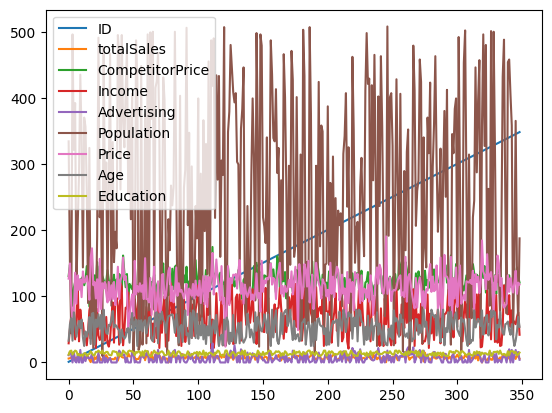

In [9]:
dataset.plot()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

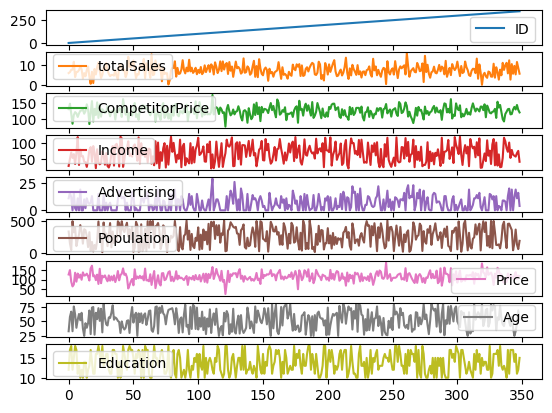

In [10]:
dataset.plot(subplots=True)

/tmp/ipykernel_34/4119858414.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


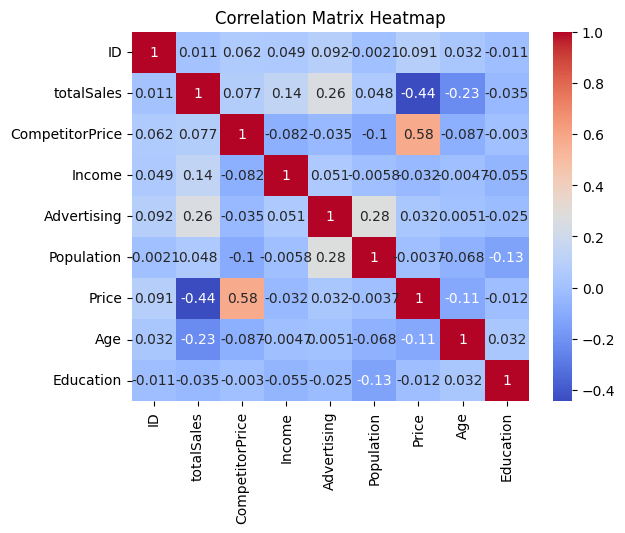

In [11]:
df = dataset.iloc[:, :]
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
dataset.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,6.01,131,29,11,335,127,0,33,12,1,1
1,2,6.50,148,51,16,148,150,2,58,17,0,1
2,3,7.70,118,71,12,44,89,2,67,18,0,1
3,4,7.78,86,54,0,497,64,0,33,12,1,0
4,5,11.82,113,66,16,322,74,1,76,15,1,1


In [10]:
testdata.head()

,ID,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,131,21,8,220,171,Good,29,14,Yes,Yes
1,2,118,86,7,265,114,Good,52,15,No,Yes
2,3,129,69,10,289,110,Medium,50,16,No,Yes
3,4,157,53,0,403,124,Bad,58,16,Yes,No
4,5,112,88,2,243,99,Medium,62,11,Yes,Yes


In [11]:
# encoding
from sklearn.preprocessing import LabelEncoder

# Le = LabelEncoder()
# for i in range(len(X[0])):
#     X[:, i] = Le.fit_transform(X[:, i])
    
# for i in range(len(Z[0])):
#     Z[:, i] = Le.fit_transform(Z[:, i])

label_encoder = LabelEncoder()
dataset['Location'] = label_encoder.fit_transform(dataset['Location'])
dataset['Urban'] = label_encoder.fit_transform(dataset['Urban'])
dataset['US'] = label_encoder.fit_transform(dataset['US'])

testdata['Location'] = label_encoder.fit_transform(testdata['Location'])
testdata['Urban'] = label_encoder.fit_transform(testdata['Urban'])
testdata['US'] = label_encoder.fit_transform(testdata['US'])

testdata.head()

,ID,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,131,21,8,220,171,1,29,14,1,1
1,2,118,86,7,265,114,1,52,15,0,1
2,3,129,69,10,289,110,2,50,16,0,1
3,4,157,53,0,403,124,0,58,16,1,0
4,5,112,88,2,243,99,2,62,11,1,1


In [14]:
X = dataset.drop(['totalSales'], axis=1).values
Y = dataset.iloc[:, 1]
Z = testdata.copy().values
print(X[0])

[  1 131  29  11 335 127   0  33  12   1   1]


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [109]:
# standardisation
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_sc = scaler.fit_transform(X_train)
# Xt_sc = scaler.transform(X_test)
# Z_sc = scaler.transform(Z)

In [31]:
Y_train=Y_train.astype('int')
Y_test = Y_test.astype('int')

In [32]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': [1.0]
}

In [33]:
from sklearn import linear_model
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

# l_reg = linear_model.LogisticRegression()
# knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
rfr = RandomForestRegressor(random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10], 'max_features': [1.0],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [36]:
Vbest_model = grid_search.best_estimator_
print(Vbest_model)

RandomForestRegressor(random_state=42)


In [40]:
Vbest_model.score(X_train, Y_train)
Vbest_model.score(X_test, Y_test)

0.6097318306859527

In [132]:
predictions = Vbest_model.predict(Xt_sc)
predictions = [int(i) for i in predictions] 

final_pred = Vbest_model.predict(Z)
final_pred = [int(i) for i in final_pred] 
print(predictions)

[5, 5, 9, 3, 7, 5, 5, 7, 5, 5, 6, 8, 5, 7, 8, 9, 8, 4, 7, 8, 5, 4, 3, 7, 9, 6, 6, 6, 9, 4, 10, 10, 5, 11, 7]


In [133]:
ss.head()

,ID,Category
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [134]:
print(final_pred)

[6, 8, 7, 5, 5, 9, 7, 6, 5, 7, 3, 6, 9, 8, 3, 9, 4, 6, 7, 8, 9, 4, 9, 8, 9, 3, 7, 5, 6, 2, 10, 6, 5, 6, 6, 6, 8, 12, 6, 4, 2, 7, 8, 4, 6, 4, 3, 8, 5, 7, 9]


In [135]:
def classifier(n):
    if (n<=5):
        return 1
    elif (n>5 and n<=10):
        return 2
    else:
        return 3


In [136]:
ids = ss.loc[:, 'ID']
catg = [classifier(i) for i in final_pred]

In [137]:
df = pd.DataFrame({"ID": ids,
                   "Category": catg})

In [138]:
df.head(10)

,ID,Category
0,1,2
1,2,2
2,3,2
3,4,1
4,5,1
5,6,2
6,7,2
7,8,2
8,9,1
9,10,2


In [139]:
df.to_csv("/kaggle/working/submission__5.csv", index=False)
print("A")

A
